<div>
    <table>
        <tr>
            <td>
                <center>
                    <h1>Wurst Introduction</h1>
                     <a href="https://www.psi.ch/en/ta/people/romain-sacchi">Romain Sacchi</a> (PSI)
                    <br><br>
                    Duration: 1 hour 15 minutes.
                </center>
            </td>
        </tr>
    </div>

Github repository: [https://github.com/polca/wurst](https://github.com/polca/wurst)

Documentation: [https://wurst.readthedocs.io/](https://wurst.readthedocs.io/)

Wurst authors: Chris Mutel, Brian Cox

<div class="alert alert-info">
Note: we will be using <a href="https://docs.brightway.dev/en/legacy/">Brightway 2</a>, not <a href="https://docs.brightway.dev/en/latest/content/installation/index.html">Brightway 2.5</a>. From the user end side, very little differ between the two. The code executed throughout this notebook works with both versions.
</div>


### Scenario: Prospective Assessment of Future Solar PV Technologies

#### Background:
The Swiss energy agency is keen on understanding the potential future of solar PV technology. 
With advances in research, there are predictions of enhanced module efficiency, changes in supply chains, 
and extended lifetimes for PV modules in the next decades.

#### Objective:
To modify the ecoinvent data to reflect these anticipated changes and evaluate the prospective environmental 
benefits or potential concerns of these future solar PV technologies.

### 1. Introduction:

`wurst` is a Python library tailored for performing operations Life Cycle Assessment (LCA) data, especially the [ecoinvent](https://ecoinvent.org/) database. It provides tools to search, filter, modify, and link LCA datasets. It is a core library of [`premise`](https://github.com/polca/premise) and is very practical for performing database-wide modifications.

### Data Exploration:

1. Load the ecoinvent database.
2. Extract all processes related to Swiss solar PV.

### 2. Import:

In [1]:
import wurst
import wurst.searching as ws
import bw2io, bw2data
import matplotlib.pyplot as plt
import seaborn as sns

#### 2.1 activate a project with ecoinvent

We can re-use our `bw2` project.

In [3]:
list(bw2data.projects)

[Project: simapro,
 Project: ecoinvent-3.10-consequential,
 Project: ecoinvent-3.10-EN15804,
 Project: ecoinvent-3.8-cutoff,
 Project: ecoinvent-3.8-consequential,
 Project: ,
 Project: ecoinvent-3.7.1-cutoff,
 Project: ecoinvent-3.9.1-consequential,
 Project: ecoinvent-3.9.1-cutoff,
 Project: ecoinvent-3.10-cutoff,
 Project: bw25_ei310,
 Project: default,
 Project: ecoinvent-3.9-cutoff,
 Project: ecoinvent-3.6-cutoff,
 Project: ecoinvent-3.5-cutoff,
 Project: ecoinvent-migration,
 Project: ecoinvent-3.9.1-cutoff_bw25,
 Project: ecoinvent-3.11-cutoff,
 Project: ecoinvent-3.9.11-cutoff,
 Project: winter-school,
 Project: test,
 Project: aligned,
 Project: aligned_bw25]

In [4]:
bw2data.projects.set_current("winter-school")

#### 2.2 list databases

In [5]:
bw2data.databases

Databases dictionary with 14 object(s):
	biosphere
	carbon fiber
	ecoinvent-3.10-cutoff
	ei_cutoff_3.10_remind_SSP2-Base_2020 2025-01-20
	ei_cutoff_3.10_remind_SSP2-Base_2020 2025-01-21
	ei_cutoff_3.10_remind_SSP2-Base_2035 2025-01-20
	ei_cutoff_3.10_remind_SSP2-Base_2035 2025-01-21
	ei_cutoff_3.10_remind_SSP2-Base_2050 2025-01-20
	ei_cutoff_3.10_remind_SSP2-Base_2050 2025-01-21
	ei_cutoff_3.10_remind_SSP2-PkBudg1150_2020 2025-01-20
	ei_cutoff_3.10_remind_SSP2-PkBudg1150_2035 2025-01-20
	ei_cutoff_3.10_remind_SSP2-PkBudg1150_2050 2025-01-20
	ei_cutoff_3.10_remind_SSP2-PkBudg1150_2050 2025-01-21
	ei_cutoff_3.10_remind_SSP2-PkBudg500_2050 2025-01-21

### 3. Extracting Data:

In [6]:
database = wurst.extract_brightway2_databases("ecoinvent-3.10-cutoff")

Getting activity data


100%|███████████████████████████████████████████████████████████████████| 23523/23523 [00:00<00:00, 143906.12it/s]


Adding exchange data to activities


100%|██████████████████████████████████████████████████████████████████| 743409/743409 [00:19<00:00, 38315.03it/s]


Filling out exchange data


100%|████████████████████████████████████████████████████████████████████| 23523/23523 [00:01<00:00, 17990.20it/s]


In [7]:
type(database)

list

In [8]:
len(database)

23523

In [10]:
type(database[0])

dict

Import additional inventories

#### 3.1 Pickle database
Doing so allows us to load directly the database without going through extraction again.

In [11]:
import pickle

with open(r"ei310.pickle", "wb") as output_file:
    pickle.dump(database, output_file)

#### 3.2 Load database
Create a function that will unpickle our database, to avoid extracting it from the brightway project.

In [12]:
import pickle

def load_db():
    with open(r"ei310.pickle", "rb") as input_file:
        db = pickle.load(input_file)

    for ds in db:
        if "categories" in ds:
            del ds["categories"]
            
    return db

In [15]:
db = load_db()

In [14]:
len(db)

23523

In [16]:
# we can delete `database` to free up memory
del database

### 4. Searching for Processes:

Let's search for European solar panels in ecoinvent.

Here, we deomnstrate wurst's searching capabilities, with:

* `get_many()`: return many datasets that meet the search criteria
* `get_one()`: return only one dataset that meet the search criteria

In [ ]:
import wurst.searching as ws

In [17]:
solar_pv = ws.get_many(db, 
    ws.contains("name", "photovoltaic")
)

for ds in solar_pv:
    print(ds["name"])

electricity production, photovoltaic, 570kWp open ground installation, multi-Si
electricity production, photovoltaic, 3kWp facade installation, single-Si, laminated, integrated
electricity production, photovoltaic, 570kWp open ground installation, multi-Si
electricity production, photovoltaic, 3kWp slanted-roof installation, single-Si, panel, mounted
electricity production, photovoltaic, 3kWp slanted-roof installation, single-Si, laminated, integrated
electricity production, photovoltaic, 3kWp slanted-roof installation, multi-Si, panel, mounted
electricity production, photovoltaic, 3kWp slanted-roof installation, single-Si, panel, mounted
photovoltaic laminate production, CdTe
electricity production, photovoltaic, 3kWp slanted-roof installation, single-Si, panel, mounted
electricity production, photovoltaic, 3kWp slanted-roof installation, single-Si, panel, mounted
photovoltaic cell production, ribbon-Si
electricity production, photovoltaic, 3kWp slanted-roof installation, single-Si, p

Let's remove markets, with the help of the `ws.exclude()` filter.

In [18]:
solar_pv = ws.get_many(db, 
    ws.contains("name", "photovoltaic"),
    ws.exclude(
        ws.contains("name", "market for"),
    )
)

for ds in solar_pv:
    print(ds["name"])

electricity production, photovoltaic, 570kWp open ground installation, multi-Si
electricity production, photovoltaic, 3kWp facade installation, single-Si, laminated, integrated
electricity production, photovoltaic, 570kWp open ground installation, multi-Si
electricity production, photovoltaic, 3kWp slanted-roof installation, single-Si, panel, mounted
electricity production, photovoltaic, 3kWp slanted-roof installation, single-Si, laminated, integrated
electricity production, photovoltaic, 3kWp slanted-roof installation, multi-Si, panel, mounted
electricity production, photovoltaic, 3kWp slanted-roof installation, single-Si, panel, mounted
photovoltaic laminate production, CdTe
electricity production, photovoltaic, 3kWp slanted-roof installation, single-Si, panel, mounted
electricity production, photovoltaic, 3kWp slanted-roof installation, single-Si, panel, mounted
photovoltaic cell production, ribbon-Si
electricity production, photovoltaic, 3kWp slanted-roof installation, single-Si, p

Let's also remove electricity producing datasets

In [19]:
pv_filter = [
    ws.contains("name", "photovoltaic"),
    ws.either(
        ws.contains("name", "installation"),
        ws.contains("name", "construction"),
    ),
    ws.exclude(ws.contains("name", "market for"),),
    ws.exclude(ws.contains("name", "electricity")),
    ws.exclude(ws.contains("name", "factory")),
    ws.exclude(ws.contains("name", "module")),
    ws.equals("unit", "unit"),
    
]
solar_pv = ws.get_many(
    db, 
    *pv_filter
)

for ds in solar_pv:
    print(ds["name"], ds["location"])

photovoltaic facade installation, 3kWp, single-Si, laminated, integrated, at building RoW
photovoltaic slanted-roof installation, 3kWp, a-Si, panel, mounted, on roof RoW
photovoltaic slanted-roof installation, 3kWp, multi-Si, panel, mounted, on roof CH
photovoltaic flat-roof installation, 3kWp, single-Si, on roof CH
photovoltaic facade installation, 3kWp, single-Si, panel, mounted, at building RoW
photovoltaic slanted-roof installation, 3kWp, single-Si, laminated, integrated, on roof RoW
photovoltaic slanted-roof installation, 3kWp, a-Si, laminated, integrated, on roof RoW
photovoltaic slanted-roof installation, 3kWp, ribbon-Si, laminated, integrated, on roof CH
photovoltaic facade installation, 3kWp, multi-Si, laminated, integrated, at building CH
photovoltaic facade installation, 3kWp, multi-Si, panel, mounted, at building CH
photovoltaic slanted-roof installation, 3kWp, multi-Si, panel, mounted, on roof RoW
photovoltaic slanted-roof installation, 3kWp, ribbon-Si, laminated, integrat

### 5. Filtering Data:
List only European datasets.

Here, we combine `wurst`'s search capabilities with other libraries, such as `constructive_geometries`.

In [20]:
from constructive_geometries import geomatcher

In [21]:
geo = geomatcher.Geomatcher()

In [22]:
european_countries = geo.contained("RER")

In [23]:
european_countries

[('ecoinvent', 'RER'),
 ('ecoinvent', 'Europe without Austria'),
 ('ecoinvent', 'Europe without Switzerland'),
 ('ecoinvent', 'Europe without Switzerland and Austria'),
 ('ecoinvent', 'RER w/o CH+DE'),
 ('ecoinvent', 'Europe, without Russia and Türkiye'),
 ('ecoinvent', 'RER w/o RU'),
 ('ecoinvent', 'Europe without Switzerland and France'),
 ('ecoinvent', 'RER w/o DE+NL+RU'),
 ('ecoinvent', 'RER w/o DE+NL+NO'),
 ('ecoinvent', 'ENTSO-E'),
 ('ecoinvent', 'Europe without NORDEL (NCPA)'),
 ('ecoinvent', 'RER w/o DE+NL+NO+RU'),
 ('ecoinvent', 'RER w/o AT+BE+CH+DE+FR+IT'),
 ('ecoinvent', 'UCTE'),
 ('ecoinvent', 'IAI Area, EU27 & EFTA'),
 ('ecoinvent', 'UCTE without Germany'),
 ('ecoinvent', 'UCTE without France'),
 ('ecoinvent', 'UCTE without Germany and France'),
 ('ecoinvent', 'UN-SEUROPE'),
 ('ecoinvent', 'UN-NEUROPE'),
 'GB',
 ('ecoinvent', 'WEU'),
 ('ecoinvent', 'NORDEL'),
 'SI',
 ('ecoinvent', 'BALTSO'),
 'IT',
 ('ecoinvent', 'Russia (Europe)'),
 'LV',
 'NO',
 'FR',
 'GR',
 'MK',
 ('ec

In [24]:
pv_filter.append(
    ws.either(*[
        ws.equals("location", loc) for loc in european_countries
    ])
)

In [25]:
for ds in ws.get_many(
    db,
    *pv_filter
):
    print(ds["name"], ds["location"])

photovoltaic slanted-roof installation, 3kWp, multi-Si, panel, mounted, on roof CH
photovoltaic flat-roof installation, 3kWp, single-Si, on roof CH
photovoltaic slanted-roof installation, 3kWp, ribbon-Si, laminated, integrated, on roof CH
photovoltaic facade installation, 3kWp, multi-Si, laminated, integrated, at building CH
photovoltaic facade installation, 3kWp, multi-Si, panel, mounted, at building CH
photovoltaic flat-roof installation, 3kWp, multi-Si, on roof CH
photovoltaic slanted-roof installation, 3kWp, single-Si, laminated, integrated, on roof CH
photovoltaic slanted-roof installation, 3kWp, CIS, panel, mounted, on roof CH
photovoltaic slanted-roof installation, 3kWp, a-Si, laminated, integrated, on roof CH
photovoltaic slanted-roof installation, 3kWp, single-Si, panel, mounted, on roof CH
photovoltaic slanted-roof installation, 3kWp, ribbon-Si, panel, mounted, on roof CH
photovoltaic facade installation, 3kWp, single-Si, laminated, integrated, at building CH
photovoltaic sla

### Modify Module Efficiency:

Increase the efficiency of solar PV modules by a certain amount based on future predictions.
We can do so by reducing the area of panels needed per kilowatt-peak installation.

Here are some efficiency projections we can use:
							
| Synthesis           |           |      |          |           |          |      |      |      |
|---------------------|-----------|------|----------|-----------|----------|------|------|------|
| % module efficiency | ribbon-Si | a-Si | micro-Si | single-Si | multi-Si | CIGS | CIS  | CdTe |
| 2005                |           |      |          |           |          |      |      |      |
| 2010                | 9         | 9.5  | 10       | 15.1      | 14       | 11   | 11   | 10   |
| 2020                | 12        | 12.5 | 11.9     | 17.9      | 16.8     | 14   | 14   | 16.8 |
| 2050                | 13.5      | 14.2 | 12.5     | 26.7      | 24.4     | 23.4 | 23.4 | 21   |4	21


In [26]:
import xarray as xr
# let's store this as a dict
# Creating the dictionary from the provided data

efficiency_data = {
    "ribbon-Si": {
        2010: 9,
        2020: 12,
        2050: 13.5
    },
    "a-Si": {
        2010: 9.5,
        2020: 12.5,
        2050: 14.2
    },
    "micro-Si": {
        2010: 10,
        2020: 11.9,
        2050: 12.5
    },
    "single-Si": {
        2010: 15.1,
        2020: 17.9,
        2050: 26.7
    },
    "multi-Si": {
        2010: 14,
        2020: 16.8,
        2050: 24.4
    },
    "CIGS": {
        2010: 11,
        2020: 14,
        2050: 23.4
    },
    "CIS": {
        2010: 11,
        2020: 14,
        2050: 23.4
    },
    "CdTe": {
        2010: 10,
        2020: 16.8,
        2050: 21
    }
}

# Adjusting the structure of the dictionary to fit into a DataArray
data_values = []
technologies = list(efficiency_data.keys())
years = sorted(list(efficiency_data[technologies[0]].keys()))

for technology in technologies:
    data_values.append([efficiency_data[technology][year] for year in years])

# Creating the xarray DataArray
efficiency_da = xr.DataArray(
    data_values,
    coords=[technologies, years],
    dims=["technology", "year"]
)


In [29]:
efficiency_da.sel(technology="ribbon-Si").interp(year=2030)

<xarray.DataArray ()> Size: 8B
array(12.5)
Coordinates:
    technology  <U9 36B 'ribbon-Si'
    year        int64 8B 2030

### 6. Transforming Datasets:

#### Module efficiency
We want to look into the solar PV installation datasets and:
1. Identify the installed power
2. Identify the current efficiency
3. Identifiy the technology
4. Fetch the new efficiency
5. Modify the inputs accodingly

In [32]:
import re
import numpy as np
from prettytable import PrettyTable

def fetch_pv_power(name):
    # we use regular expression to extract the power from the dataset name (in kW)
    power = float(re.findall(r"[-+]?\d*\.\d+|\d+", name)[0])
    
    # if in MW, convert to kW
    if "mwp" in name.lower():
        power *= 1000

    return power

def modify_module_efficiency(db, year):

    modifications = []
    
    for dataset in ws.get_many(
        db,
        *pv_filter
    ):
    
        power = fetch_pv_power(dataset["name"])
    
        # we look for an input of PV panel, in square meters
        for exc in ws.technosphere(
            dataset,
            *[
                ws.either(
                    ws.contains("name", "photovoltaic panel"),
                    ws.contains("name", "photovoltaic laminate"),
                ),
                ws.equals("unit", "square meter"),
            ],
        ):
            surface = float(exc["amount"])
            max_power = surface  # in kW, since we assume a constant 1,000W/m^2
            current_eff = power / max_power
    
            possible_techs = [
                "ribbon-Si",
                "a-Si",
                "micro-Si",
                "single-Si",
                "multi-Si",
                "CIGS",
                "CIS",
                "CdTe",
            ]
            
            pv_tech = [
                i for i in possible_techs if i.lower() in exc["name"].lower()
            ]
    
            if len(pv_tech) > 0:
                pv_tech = pv_tech[0]
    
                new_eff = efficiency_da.sel(technology=pv_tech).interp(year=year).values/100
    
                # in case self.year <2010 or >2050
                #new_eff = np.clip(new_eff, 0.1, 0.27)
                
                modifications.append(
                    [dataset["name"][-50:], power, pv_tech, round(current_eff, 2), round(new_eff, 2), round(float(current_eff / new_eff), 2)]
                )
                exc["amount"] *= float(current_eff / new_eff)
    
    table = PrettyTable(["Name", "Power", "Tech", "Current eff", "New eff", "Scaling factor"])
    table.add_rows(modifications)
    print(table)

    return db

In [34]:
db = load_db()

In [35]:
db = modify_module_efficiency(db, 2050)

+----------------------------------------------------+-------+-----------+-------------+---------+----------------+
|                        Name                        | Power |    Tech   | Current eff | New eff | Scaling factor |
+----------------------------------------------------+-------+-----------+-------------+---------+----------------+
| tallation, 3kWp, multi-Si, panel, mounted, on roof |  3.0  |  multi-Si |     0.13    |   0.24  |      0.52      |
| c flat-roof installation, 3kWp, single-Si, on roof |  3.0  | single-Si |     0.14    |   0.27  |      0.51      |
| n, 3kWp, ribbon-Si, laminated, integrated, on roof |  3.0  | ribbon-Si |     0.12    |   0.14  |      0.86      |
| 3kWp, multi-Si, laminated, integrated, at building |  3.0  |  multi-Si |     0.13    |   0.24  |      0.52      |
| ation, 3kWp, multi-Si, panel, mounted, at building |  3.0  |  multi-Si |     0.13    |   0.24  |      0.52      |
| ic flat-roof installation, 3kWp, multi-Si, on roof |  3.0  |  multi-Si

### Extend Module Lifetime:

Increase the operational lifetime of the solar PV modules from the typical 25 years to, say, 30 years in 2035 and 40 years in 2050.
This modification will affect the input requirements per kilowatt hour produced.

In [38]:
def modify_pv_lifetime(db, current_lifetime, new_lifetime):

    modifications = []
    
    # search where our PV panels are used:
    for ds in ws.get_many(
        db,
        ws.contains("name", "electricity"),
        ws.equals("unit", "kilowatt hour"),
        ws.exclude(ws.contains("name", "renewable")),
        ws.contains("location", "CH")
    ):
        for exc in ws.technosphere(
            ds,
            *pv_filter
        ):
            power = fetch_pv_power(exc["name"])
    
            panel_fraction = exc["amount"]
            lifetime_production = 1/exc["amount"]
            annual_production = 1/exc["amount"]/current_lifetime
            annual_prod_per_kW = annual_production / power

            exc["amount"] *= current_lifetime/new_lifetime
    
            modifications.append(
                [
                    ds["name"][-50:],
                    ds["location"],
                    int(lifetime_production),
                    int(annual_production),
                    int(annual_prod_per_kW),
                    '{:.2E}'.format(exc["amount"]),
                    '{:.2E}'.format(exc["amount"] * current_lifetime/new_lifetime)
                ]
            )
    
    table = PrettyTable(["Name", "Loc", "kWh/lifetime", "kWh/year", "kWh/year/kW", "Old input", "New input"])
    table.add_rows(modifications)
    print(table)

    return db

In [39]:
db = load_db()
db = modify_pv_lifetime(db, 25, 30)

+----------------------------------------------------+-----+--------------+----------+-------------+-----------+-----------+
|                        Name                        | Loc | kWh/lifetime | kWh/year | kWh/year/kW | Old input | New input |
+----------------------------------------------------+-----+--------------+----------+-------------+-----------+-----------+
| ade installation, single-Si, laminated, integrated |  CH |    55800     |   2232   |     744     |  1.49E-05 |  1.24E-05 |
| oof installation, single-Si, laminated, integrated |  CH |    82980     |   3319   |     1106    |  1.00E-05 |  8.37E-06 |
| otovoltaic, 3kWp flat-roof installation, single-Si |  CH |    82980     |   3319   |     1106    |  1.00E-05 |  8.37E-06 |
| ted-roof installation, CdTe, laminated, integrated |  CH |    82980     |   3319   |     1106    |  1.00E-05 |  8.37E-06 |
| oof installation, ribbon-Si, laminated, integrated |  CH |    82980     |   3319   |     1106    |  1.00E-05 |  8.37E-06 |


### Decarbonize the production of aluminium

PV panel installations require substantial amounts of aliminium for the panel frame itself, but also, and mostly, for the mounting system.

The production of alumiminium in certain regions still relies to a significant extent on fossil-based electricity (see *market for electricity, high voltage, aluminium industry*). The Swiss Environmental Agency foresees that, while natural gas-based electricity will still be used by aluminum smelters, coal will slowly be phased out: by half by 2035, and completely by 2050.

The Swiss Environmental Agency also thinks that natural gas-fired power plants will be 5% and 10% more efficient by 2035 and 2050, relative to today. 

In [40]:
def modify_al_electricity_mix(db, scaling_factor_coal, scaling_factor_coal_ng):

    ############### Aluminium electricity mix #################
    modifications = []

    for ds in ws.get_many(
            db,
            ws.contains("name", "market for electricity, high voltage, aluminium industry"),
            ws.equals("unit", "kilowatt hour"),
        ):

        shares, surplus = {}, 0

        for exc in ws.technosphere(
            ds,
            ws.contains("name", "electricity production"),
            ws.contains("unit", "kilowatt hour")
        ):
            shares[exc["name"]] = {"old": exc["amount"]}

        
        for tech, share in shares.items():
            if "coal" in tech:
                shares[tech]["new"] = share["old"] * scaling_factor_coal
                surplus = share["old"] - share["new"]

        
        for tech, share in shares.items():
            if "coal" not in tech:
                shares[tech]["new"] = share["old"] + (surplus / (len(shares) - 1))
                
        for exc in ws.technosphere(
            ds,
            ws.contains("name", "electricity production")             
        ):
            if exc["name"] in shares:
                exc["amount"] = shares[exc["name"]]["new"]

        modifications.extend(
            [
                ds["name"][-30:], ds["location"], tech[-30:], round(v["old"], 3), round(v["new"], 3), round(sum(x["new"] for x in shares.values()), 2)
            ] for tech, v in shares.items()
        )

    table = PrettyTable(["Name", "Loc", "Tech", "Old share", "New share", "Sum shares"])
    table.add_rows(modifications)
    print(table)

    ################ NG POWER PLANTS #####################

    generation_filters = [
        ws.contains('name', 'electricity production'),
        ws.contains("name", "natural gas"),
        ws.equals('unit', 'kilowatt hour'),
    ]

    fuel_independent_cooling = ws.doesnt_contain_any(
        'name', (
        'water, decarbonised', )
    )

    fuel_independent = ws.doesnt_contain_any('name', (
        'Methane, fossil', 'Sulfur dioxide', 'Carbon monoxide, fossil',
        'Nitrogen oxides', 'Dinitrogen monoxide', 'Particulates'
    ))

    for ds in ws.get_many(db, *generation_filters):

        wurst.transformations.change_exchanges_by_constant_factor(
            ds,
            scaling_factor_coal_ng,  # Or whatever from input data
            [fuel_independent_cooling],
            [fuel_independent]
        )
    
    return db

In [41]:
db = modify_al_electricity_mix(db, 0.5, 0.9)

+--------------------------------+----------------------------------------+--------------------------------+-----------+-----------+------------+
|              Name              |                  Loc                   |              Tech              | Old share | New share | Sum shares |
+--------------------------------+----------------------------------------+--------------------------------+-----------+-----------+------------+
| gh voltage, aluminium industry |               UN-OCEANIA               | ion, hydro, aluminium industry |    0.27   |   0.635   |    1.0     |
| gh voltage, aluminium industry |               UN-OCEANIA               | tion, coal, aluminium industry |    0.73   |   0.365   |    1.0     |
| gh voltage, aluminium industry |                  RoW                   | n, nuclear, aluminium industry |    0.09   |   0.545   |    1.0     |
| gh voltage, aluminium industry |                  RoW                   | tion, coal, aluminium industry |    0.91   |   0

### 7. Running the script:

Run the three transformation functions for 2035 and 2050

In [42]:
db_2035, db_2050 = load_db(), load_db()

In [43]:
db_2035 = modify_module_efficiency(db_2035, 2035)
db_2050 = modify_module_efficiency(db_2050, 2050)

db_2035 = modify_pv_lifetime(db_2035, 25, 30)
db_2050 = modify_pv_lifetime(db_2050, 25, 40)

db_2035 = modify_al_electricity_mix(db_2035, .5, .95)
db_2050 = modify_al_electricity_mix(db_2050, 0, .9)

+----------------------------------------------------+-------+-----------+-------------+---------+----------------+
|                        Name                        | Power |    Tech   | Current eff | New eff | Scaling factor |
+----------------------------------------------------+-------+-----------+-------------+---------+----------------+
| tallation, 3kWp, multi-Si, panel, mounted, on roof |  3.0  |  multi-Si |     0.13    |   0.21  |      0.62      |
| c flat-roof installation, 3kWp, single-Si, on roof |  3.0  | single-Si |     0.14    |   0.22  |      0.61      |
| n, 3kWp, ribbon-Si, laminated, integrated, on roof |  3.0  | ribbon-Si |     0.12    |   0.13  |      0.91      |
| 3kWp, multi-Si, laminated, integrated, at building |  3.0  |  multi-Si |     0.13    |   0.21  |      0.62      |
| ation, 3kWp, multi-Si, panel, mounted, at building |  3.0  |  multi-Si |     0.13    |   0.21  |      0.62      |
| ic flat-roof installation, 3kWp, multi-Si, on roof |  3.0  |  multi-Si

### 8. Exporting Databases:

Here, we use `wurst`'s export capability. 
In this case, we export the modified databases back to the `brightway` project.

In [44]:
# let's delete these databases if they already exist in our project.

if "PV 2035" in bw2data.databases:
    del bw2data.databases["PV 2035"]

if "PV 2050" in bw2data.databases:
    del bw2data.databases["PV 2050"]

In [45]:
wurst.write_brightway2_database(db_2035, "PV 2035")
wurst.write_brightway2_database(db_2050, "PV 2050")

23523 datasets
743409 exchanges
0 unlinked exchanges
  


Writing activities to SQLite3 database:
0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:00:16


Title: Writing activities to SQLite3 database:
  Started: 02/06/2025 14:48:39
  Finished: 02/06/2025 14:48:56
  Total time elapsed: 00:00:16
  CPU %: 93.10
  Memory %: 19.57
Created database: PV 2035
23523 datasets
743409 exchanges
0 unlinked exchanges
  


Writing activities to SQLite3 database:
0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:00:16


Title: Writing activities to SQLite3 database:
  Started: 02/06/2025 14:50:41
  Finished: 02/06/2025 14:50:58
  Total time elapsed: 00:00:16
  CPU %: 91.80
  Memory %: 19.20
Created database: PV 2050


### 9. Comparing results:

In [46]:
FU = [
    act for db in [
        "ecoinvent-3.10-cutoff", "PV 2035", "PV 2050"
    ] for act in bw2data.Database(db) if "electricity production" in act["name"]
    and "photovoltaic" in act["name"] and act["unit"] == "kilowatt hour" 
    and act["location"] == "CH"
]

In [47]:
len(FU)

54

In [48]:
method = ('IPCC 2021', 'climate change: fossil', 'global warming potential (GWP100)')

Let's calculate this.

In [51]:
import bw2calc
import numpy as np
from bw2calc.errors import OutsideTechnosphere

# we create an array to store our results
results = []

# we initialize the LCA matrices
lca = bw2calc.LCA({FU[0]: 1}, method)
lca.lci()
lca.lcia()

for i, fu in enumerate(FU):
    try:
        lca.redo_lci({fu: 1})
        lca.lcia()
    except OutsideTechnosphere:
        lca = bw2calc.LCA({fu: 1}, method)
        lca.lci()
        lca.lcia()
        
    results.append(lca.score)

In [52]:
import pandas as pd
df = pd.DataFrame(
    zip(
        [a["name"] for a in FU],
        [a["database"] for a in FU],
        results
    ),
    columns=["name", "year", "GWP"]
)

In [53]:
df.head()

,name,year,GWP
0,"electricity production, photovoltaic, 3kWp sla...",ecoinvent-3.10-cutoff,0.067716
1,"electricity production, photovoltaic, 3kWp fac...",ecoinvent-3.10-cutoff,0.117389
2,"electricity production, photovoltaic, 3kWp sla...",ecoinvent-3.10-cutoff,0.076454
3,"electricity production, photovoltaic, 3kWp sla...",ecoinvent-3.10-cutoff,0.080722
4,"electricity production, photovoltaic, 3kWp sla...",ecoinvent-3.10-cutoff,0.084010


In [54]:
df = df.replace("ecoinvent-3.10-cutoff", 2020)
df = df.replace("PV 2035", 2035)
df = df.replace("PV 2050", 2050)
df["year"] = df["year"].astype("str")

/var/folders/cn/pys1j9rn0y7djkhv3hfdtrs00000gn/T/ipykernel_64653/4150662962.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace("PV 2050", 2050)


Text(0, 0.5, 'kg CO$_2$-eq./kWh')

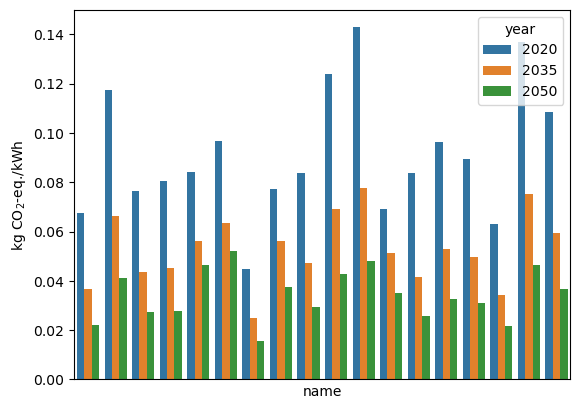

In [55]:


# plot with seaborn barplot
sns.barplot(data=df, x='name', y='GWP', hue='year')

plt.xticks([])
plt.ylabel("kg CO$_2$-eq./kWh")

### 10. Bonus: can you show the respective tranformation contributions?

In [56]:
db_2050_1 = load_db()
db_2050_1 = modify_module_efficiency(db_2050_1, 2050)

if "PV 2050 - eff" in bw2data.databases:
    del bw2data.databases["PV 2050 - eff"]
    
wurst.write_brightway2_database(db_2050_1, "PV 2050 - eff")

db_2050_2 = load_db()
db_2050_2 = modify_module_efficiency(db_2050_2, 2050)
db_2050_2 = modify_pv_lifetime(db_2050_2, 25, 40)

if "PV 2050 - eff - lifetime" in bw2data.databases:
    del bw2data.databases["PV 2050 - eff - lifetime"]
    
wurst.write_brightway2_database(db_2050_2, "PV 2050 - eff - lifetime")

+----------------------------------------------------+-------+-----------+-------------+---------+----------------+
|                        Name                        | Power |    Tech   | Current eff | New eff | Scaling factor |
+----------------------------------------------------+-------+-----------+-------------+---------+----------------+
| tallation, 3kWp, multi-Si, panel, mounted, on roof |  3.0  |  multi-Si |     0.13    |   0.24  |      0.52      |
| c flat-roof installation, 3kWp, single-Si, on roof |  3.0  | single-Si |     0.14    |   0.27  |      0.51      |
| n, 3kWp, ribbon-Si, laminated, integrated, on roof |  3.0  | ribbon-Si |     0.12    |   0.14  |      0.86      |
| 3kWp, multi-Si, laminated, integrated, at building |  3.0  |  multi-Si |     0.13    |   0.24  |      0.52      |
| ation, 3kWp, multi-Si, panel, mounted, at building |  3.0  |  multi-Si |     0.13    |   0.24  |      0.52      |
| ic flat-roof installation, 3kWp, multi-Si, on roof |  3.0  |  multi-Si

Writing activities to SQLite3 database:
0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:00:14


Title: Writing activities to SQLite3 database:
  Started: 02/06/2025 14:59:19
  Finished: 02/06/2025 14:59:34
  Total time elapsed: 00:00:14
  CPU %: 92.10
  Memory %: 7.18
Created database: PV 2050 - eff
+----------------------------------------------------+-------+-----------+-------------+---------+----------------+
|                        Name                        | Power |    Tech   | Current eff | New eff | Scaling factor |
+----------------------------------------------------+-------+-----------+-------------+---------+----------------+
| tallation, 3kWp, multi-Si, panel, mounted, on roof |  3.0  |  multi-Si |     0.13    |   0.24  |      0.52      |
| c flat-roof installation, 3kWp, single-Si, on roof |  3.0  | single-Si |     0.14    |   0.27  |      0.51      |
| n, 3kWp, ribbon-Si, laminated, integrated, on roof |  3.0  | ribbon-Si |     0.12    |   0.14  |      0.86      |
| 3kWp, multi-Si, laminated, integrated, at building |  3.0  |  multi-Si |     0.13    |   0.24  | 

Writing activities to SQLite3 database:
0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:00:15


Title: Writing activities to SQLite3 database:
  Started: 02/06/2025 15:01:39
  Finished: 02/06/2025 15:01:55
  Total time elapsed: 00:00:15
  CPU %: 89.40
  Memory %: 7.30
Created database: PV 2050 - eff - lifetime


In [57]:
FU_contributions = [
    act for db in [
        "ecoinvent-3.10-cutoff", "PV 2050 - eff", "PV 2050 - eff - lifetime", "PV 2050"
    ] for act in bw2data.Database(db) if "electricity production" in act["name"]
    and "photovoltaic" in act["name"] and act["unit"] == "kilowatt hour" 
    and act["location"] == "CH"
]

In [58]:
import bw2calc
import numpy as np
from bw2calc.errors import OutsideTechnosphere

# we create an array to store our results
results = []

# we initialize the LCA matrices
lca = bw2calc.LCA({FU_contributions[0]: 1}, method)
lca.lci(factorize=True)
lca.lcia()

for i, fu in enumerate(FU_contributions):
    try:
        lca.redo_lci({fu: 1})
        lca.lcia()
    except OutsideTechnosphere:
        lca = bw2calc.LCA({fu: 1}, method)
        lca.lci(factorize=True)
        lca.lcia()
        
    results.append(lca.score)

/opt/homebrew/Caskroom/miniforge/base/envs/wurst/lib/python3.11/site-packages/scikits/umfpack/umfpack.py:736: UmfpackWarning: (almost) singular matrix! (estimated cond. number: 5.51e+12)
  warnings.warn(msg, UmfpackWarning)
/opt/homebrew/Caskroom/miniforge/base/envs/wurst/lib/python3.11/site-packages/scikits/umfpack/umfpack.py:736: UmfpackWarning: (almost) singular matrix! (estimated cond. number: 2.24e+12)
  warnings.warn(msg, UmfpackWarning)


In [60]:
import pandas as pd
df = pd.DataFrame(
    zip(
        [a["name"] for a in FU_contributions],
        [a["database"] for a in FU_contributions],
        results
    ),
    columns=["name", "year", "GWP"]
)

In [61]:
df = df.replace("ecoinvent-3.10-cutoff", 2020)
df = df.replace("PV 2050 - eff", "2050 -- 1 eff only")
df = df.replace("PV 2050 - eff - lifetime", "2050 -- 2 eff + lifetime ext.")
df = df.replace("PV 2050", "2050 -- 3 eff + lifetime ext. + coal phase out")
df["year"] = df["year"].astype("str")

Text(0, 0.5, 'kg CO$_2$-eq./kWh')

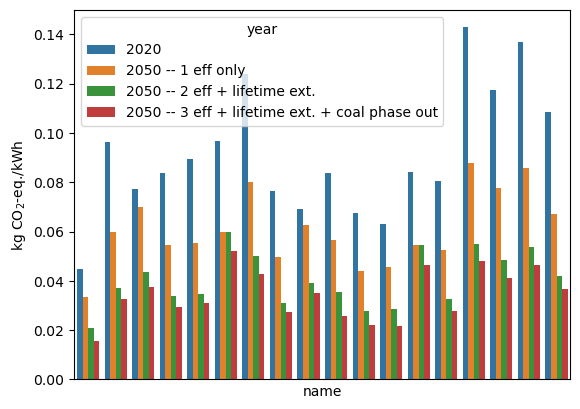

In [62]:
# plot with seaborn barplot
sns.barplot(data=df, x='name', y='GWP', hue='year')
plt.xticks([])
plt.ylabel("kg CO$_2$-eq./kWh")

### 11. Bonus 2: Home storage systems

#### Exercise: Estimating Home Energy Storage Capacity

#### Background:
You want to purchase a solar photovoltaic system for the roof of your residence. 
This system converts sunlight into electricity that powers your home. 
On days when the system produces more electricity than your home consumes, 
the excess energy can be stored in batteries for use during nighttime or on days when the sun isn't shining.

#### Objective:

1. Estimate the solar PV installation and storage capacities required for your home energy storage system, considering only 
the excess solar production that isn't consumed directly by the household during daylight time.
2. Add the storage capacity in photovoltaic electricity production datasets
3. Estimate the increase in carbon footprint resulting from home energy storage.

Given:

1. On average, your location in Switzerland receives 5 hours of effective sunlight per day (i.e., full load).
2. Your household's electricity consumption is 10 kWh during daylight and 5 kWh during nighttime.
3. You want the storage system to provide enough for the nighttime.
4. Batteries typically have a recommended Depth of Discharge (DoD) of 90%, meaning only 90% of their total capacity should be used to ensure a longer lifespan.
Energy storage systems have a round-trip efficiency of 80%. This accounts for energy losses during the charging and discharging processes. Also,
we assume a 3,000 cycles lifetime for the battery cells (where 1 day = 1 cycle), while the Balance of Plant can outlast the PV installation.
Finally, 30% of the battery system mass is the Balance of Plant.

In [63]:
# Given values for total daily consumption
total_daily_consumption = 15  # kWh (10 kWh daytime + 5 kWh evening)
average_sunlight_hours = 5 # hours

# Calculate the required solar installation capacity for total daily consumption
required_total_solar_capacity = total_daily_consumption / average_sunlight_hours
required_total_solar_capacity # kWp

3.0

In [64]:
# storage capacity
net_storage_capacity = 5 # kWh
net_storage_capacity /= .9 # Depth of Discharge
net_storage_capacity /= .8 # 80% round-trip efficiency

round(net_storage_capacity)

7

In [65]:
db = load_db()

In [66]:
import wurst.searching as ws
# let's find battery cell LCIs
for ds in ws.get_many(
    db,
    ws.contains("name", "battery cell, Li-ion")
):
    print(ds["name"])

market for battery cell, Li-ion, LiMn2O4
market for battery cell, Li-ion, NMC811
market for battery cell, Li-ion, NCA
market for battery cell, Li-ion, NMC111
market for battery cell, Li-ion, LFP


In [67]:
cells = ws.get_one(db, ws.contains("name", "market for battery cell, Li-ion, NMC811"))
BoP = ws.get_one(db, ws.contains("name", "battery management system production"))

In [68]:
# battery sizing
# we assume 1 kg NMC cell = 0.2 kWh storage
# and 30% of the system mass is the Balance of Plant
cell_mass = round(net_storage_capacity) / 0.2
BoP_mass = .3 * cell_mass / .7

In [69]:
cell_mass

35.0

In [70]:
BoP_mass

15.000000000000002

In [71]:
lifetime_replacements = (25 * 365) / 3000 # 25 years lifetime for the PV, 3000 cycles for the battery
lifetime_replacements

3.0416666666666665

In [72]:
for ds in ws.get_many(
    db,
    ws.contains("name", "electricity production, photovoltaic"),
    ws.contains("name", "3kWp"),
    ws.equals("location", "CH"),
    ws.equals("unit", "kilowatt hour")
):
    for exc in ws.technosphere(ds, ws.equals("unit", "unit"), ws.contains("name", "photovoltaic")):
        production = 1 / exc["amount"] #kWh/lifetime
    ds["exchanges"].extend(
        [
            {
                "name": cells["name"],
                "product": cells["reference product"],
                "location": cells["location"],
                "unit": cells["unit"],
                "amount": cell_mass * lifetime_replacements / production,
                "type": "technosphere"
            },
            {
                "name": BoP["name"],
                "product": BoP["reference product"],
                "location": BoP["location"],
                "unit": BoP["unit"],
                "amount": BoP_mass / production,
                "type": "technosphere"
            },
        ]
        
    )

In [73]:
if "PV + storage" in bw2data.databases:
    del bw2data.databases["PV + storage"]
wurst.write_brightway2_database(db, "PV + storage")

23523 datasets
743445 exchanges
0 unlinked exchanges
  


Writing activities to SQLite3 database:
0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:00:14


Title: Writing activities to SQLite3 database:
  Started: 02/06/2025 15:48:57
  Finished: 02/06/2025 15:49:12
  Total time elapsed: 00:00:14
  CPU %: 92.30
  Memory %: 7.45
Created database: PV + storage


In [74]:
FU_storage = [
    act for db in [
        "ecoinvent-3.10-cutoff", "PV + storage", 
    ] for act in bw2data.Database(db) if "electricity production" in act["name"]
    and "photovoltaic" in act["name"] and act["unit"] == "kilowatt hour" 
    and act["location"] == "CH" and "3kWp" in act["name"]
]

In [75]:
len(FU_storage)

36

In [76]:
import bw2calc
import numpy as np
from bw2calc.errors import OutsideTechnosphere

# we create an array to store our results
results = []

# we initialize the LCA matrices
lca = bw2calc.LCA({FU_storage[0]: 1}, method)
lca.lci(factorize=True)
lca.lcia()

for i, fu in enumerate(FU_storage):
    try:
        lca.redo_lci({fu: 1})
        lca.lcia()
    except OutsideTechnosphere:
        lca = bw2calc.LCA({fu: 1}, method)
        lca.lci()
        lca.lcia()
        
    results.append(lca.score)

/opt/homebrew/Caskroom/miniforge/base/envs/wurst/lib/python3.11/site-packages/scikits/umfpack/umfpack.py:736: UmfpackWarning: (almost) singular matrix! (estimated cond. number: 1.21e+13)
  warnings.warn(msg, UmfpackWarning)
/opt/homebrew/Caskroom/miniforge/base/envs/wurst/lib/python3.11/site-packages/scikits/umfpack/umfpack.py:736: UmfpackWarning: (almost) singular matrix! (estimated cond. number: 1.57e+13)
  warnings.warn(msg, UmfpackWarning)


In [77]:
import pandas as pd
df = pd.DataFrame(
    zip(
        [a["name"] for a in FU_storage],
        [a["database"] for a in FU_storage],
        results
    ),
    columns=["name", "storage", "GWP"]
)

In [78]:
df = df.replace("ecoinvent-3.10-cutoff", "No storage")

Text(0, 0.5, 'kg CO$_2$-eq./kWh')

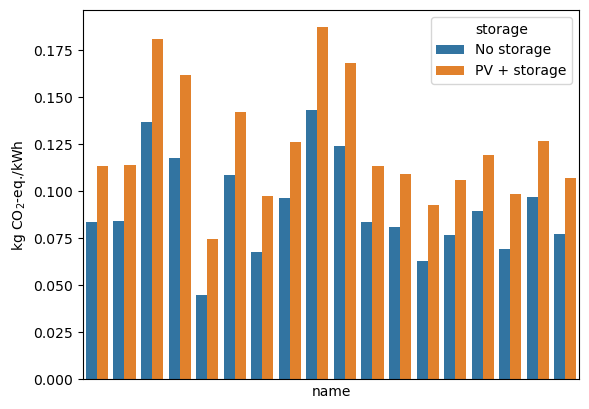

In [79]:
# plot with seaborn barplot
sns.barplot(data=df, x='name', y='GWP', hue='storage')
plt.xticks([])
plt.ylabel("kg CO$_2$-eq./kWh")

### 12. New silicon wafer market

Finally, the Swiss Energy Agency wants us to consider the current landscape of silicon wafer suppliers and project an increase in supply from Germany (up to half of the supply globally).

The market for silicon wafers in ecoinvent is indeed not up-to-date.
We want to use current statistics to update it.

![title](wafer_shares.png)

From the statistics above, we derive the following shares by geography:

In [81]:
# Silicon wafer market shares:
shares_current = {
    "CN": 0.32,
    "JP": 0.25,
    "TW": 0.17,
    "KR": 0.13,
    "DE": 0.13,
}

In [82]:
import wurst.transformations as wt

In [83]:
db = load_db()

Let's search for the silicon wafer production processes and related datasets

In [84]:
for ds in ws.get_many(
    db,
    ws.equals("name", "single-Si wafer production, photovoltaic")
):
    print(ds["name"], ds["location"])

single-Si wafer production, photovoltaic RoW
single-Si wafer production, photovoltaic RER


Let's use the European dataset (`RER`) as a proxy to build the activities for the other countries.

Here, we use two `wurst` functions:
* `copy_to_new_location()`: copy an existing dataset and change its location,
* `relink_technosphere_exchanges`: update the technosphere exchanges to geographically more appropriate suppliers.

In [86]:
# meaning activities in the silicon wafer supply chain
proxy_datasets = [
    "silicon production, single crystal, Czochralski process, photovoltaics",
    "market for silicon, single crystal, Czochralski process, photovoltaics",
    "single-Si wafer production, photovoltaic",
]

for proxy_dataset in proxy_datasets:
    proxy_ds = ws.get_one(
        db,
        ws.equals("name", proxy_dataset),
        ws.equals("location", "RER")
    )

    for country in shares_current:
        new_ds = wt.copy_to_new_location(
            proxy_ds, country
        )
    
        for exc in ws.technosphere(
            new_ds,
            ws.contains("name", "market group for")
        ):
            exc["name"] = exc["name"].replace("market group for", "market for")
            
        try:
            wt.relink_technosphere_exchanges(
                new_ds,
                db
            )
        except:
            pass
        print(new_ds["name"], new_ds["location"])
        db.append(new_ds)

silicon production, single crystal, Czochralski process, photovoltaics CN
silicon production, single crystal, Czochralski process, photovoltaics JP
silicon production, single crystal, Czochralski process, photovoltaics TW
silicon production, single crystal, Czochralski process, photovoltaics KR
silicon production, single crystal, Czochralski process, photovoltaics DE
market for silicon, single crystal, Czochralski process, photovoltaics CN
market for silicon, single crystal, Czochralski process, photovoltaics JP
market for silicon, single crystal, Czochralski process, photovoltaics TW
market for silicon, single crystal, Czochralski process, photovoltaics KR
market for silicon, single crystal, Czochralski process, photovoltaics DE
single-Si wafer production, photovoltaic CN
single-Si wafer production, photovoltaic JP
single-Si wafer production, photovoltaic TW
single-Si wafer production, photovoltaic KR
single-Si wafer production, photovoltaic DE


And we also need to modify `market for single-Si wafer, photovoltaic` to include these new shares.

In [87]:
wafer_market = ws.get_one(
    db,
    ws.equals("name", "market for single-Si wafer, photovoltaic"),
    ws.equals("location", "GLO")
)

In [88]:
import copy
for exc in ws.technosphere(
    wafer_market,
    ws.equals("name", "single-Si wafer production, photovoltaic")
):
    exc["amount"] = 0
    proxy_exc=copy.deepcopy(exc)

In [89]:
for country, share in shares_current.items():
    new_exc = copy.deepcopy(proxy_exc)
    new_exc["location"] = country
    new_exc["amount"] = share
    
    wafer_market["exchanges"].append(
       new_exc 
    )

In [90]:
for exc in ws.technosphere(
    wafer_market,
    ws.equals("name", "single-Si wafer production, photovoltaic")
):
    print(exc["name"], exc["location"], exc["amount"])

single-Si wafer production, photovoltaic RoW 0
single-Si wafer production, photovoltaic RER 0
single-Si wafer production, photovoltaic CN 0.32
single-Si wafer production, photovoltaic JP 0.25
single-Si wafer production, photovoltaic TW 0.17
single-Si wafer production, photovoltaic KR 0.13
single-Si wafer production, photovoltaic DE 0.13


In [91]:
for ds in ws.get_many(
    db,
    ws.equals("name", "single-Si wafer production, photovoltaic"),
    ws.equals("location", "CN")
):
    for exc in ds["exchanges"]:
        print(exc["name"], exc["amount"], exc.get("location"))
    print()

single-Si wafer production, photovoltaic 1.0 CN
Water 0.0097509 None
AOX, Adsorbable Organic Halides 0.00050129 None
BOD5, Biological Oxygen Demand 0.029555 None
COD, Chemical Oxygen Demand 0.029555 None
Cadmium II 6.0508e-06 None
Chromium III 3.0254e-05 None
Copper ion 6.0508e-05 None
DOC, Dissolved Organic Carbon 0.011083 None
Lead II 3.0254e-05 None
Mercury II 6.0508e-06 None
Nickel II 6.0508e-05 None
Nitrogen 0.0099449 None
Phosphate 0.00050129 None
TOC, Total Organic Carbon 0.011083 None
Water 0.0552551 None
market for acetic acid, without water, in 98% solution state 0.039 GLO
market for acrylic binder, with water, in 54% solution state 0.002 RoW
market for alkylbenzene sulfonate, linear, petrochemical 0.24 GLO
market for brass 0.00745 RoW
market for dipropylene glycol monomethyl ether 0.3 RoW
market for electricity, medium voltage 0.4306449161154133 CN-SWG
market for electricity, medium voltage 0.9084220933159923 CN-CCG
market for electricity, medium voltage 1.0132638421216362 C

In [92]:
for ds in ws.get_many(
    db,
    ws.equals("name", "market for silicon, single crystal, Czochralski process, photovoltaics"),
    ws.equals("location", "CN")
):
    for exc in ds["exchanges"]:
        print(exc["name"], exc["amount"], exc.get("location"))
    print()

market for silicon, single crystal, Czochralski process, photovoltaics 1.0 CN
silicon production, single crystal, Czochralski process, photovoltaics 1.0 CN



In [93]:
for ds in ws.get_many(
    db,
    ws.equals("name", "silicon production, single crystal, Czochralski process, photovoltaics"),
    ws.equals("location", "CN")
):
    for exc in ds["exchanges"]:
        print(exc["name"], exc["amount"], exc.get("location"))
    print()

silicon production, single crystal, Czochralski process, photovoltaics 1.0 CN
Water 1.22576845 None
Acetic acid 0.053987 None
BOD5, Biological Oxygen Demand 0.13690685752697 None
COD, Chemical Oxygen Demand 0.13690685752697 None
DOC, Dissolved Organic Carbon 0.0398063804888533 None
Fluoride 0.0023713 None
Hydrocarbons, unspecified 0.022841 None
Hydroxide 0.0074169 None
Nitrogen 0.0091039 None
TOC, Total Organic Carbon 0.0398063804888533 None
Water 3.25210455 None
Water, cooling, unspecified natural origin 2.333 None
Water, river 2.0508 None
market for acetic acid, without water, in 98% solution state 0.10797 GLO
market for acetone, liquid 0.049003 RoW
market for argon, liquid 5.7944 RoW
market for ceramic tile 0.33645 GLO
market for electricity, medium voltage 4.607900602434921 CN-SWG
market for electricity, medium voltage 9.720116398481117 CN-CCG
market for electricity, medium voltage 10.841923110701506 CN-NWG
market for electricity, medium voltage 10.112922513531476 CN-NECG
market fo

In [94]:
if "wafer" in bw2data.databases:
    del bw2data.databases["wafer"]
wurst.write_brightway2_database(db, "wafer")

23538 datasets
743776 exchanges
0 unlinked exchanges
  


Writing activities to SQLite3 database:
0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:00:15


Title: Writing activities to SQLite3 database:
  Started: 02/06/2025 16:11:29
  Finished: 02/06/2025 16:11:44
  Total time elapsed: 00:00:15
  CPU %: 91.80
  Memory %: 8.22
Created database: wafer


In [95]:
FU_wafer = [
    act for db in [
        "ecoinvent-3.10-cutoff", "wafer", 
    ] for act in bw2data.Database(db) if "electricity production" in act["name"]
    and "photovoltaic" in act["name"] and act["unit"] == "kilowatt hour" 
    and act["location"] == "CH" and "3kWp" in act["name"]
    and "single-Si" in act["name"]
]

In [96]:
len(FU_wafer)

12

In [97]:
for fu in FU_wafer:
    print(fu["name"])

electricity production, photovoltaic, 3kWp facade installation, single-Si, panel, mounted
electricity production, photovoltaic, 3kWp flat-roof installation, single-Si
electricity production, photovoltaic, 3kWp facade installation, single-Si, laminated, integrated
electricity production, photovoltaic, 3kWp slanted-roof installation, single-Si, laminated, integrated
electricity production, photovoltaic, 3kWp slanted-roof installation, single-Si, panel, mounted
electricity production, photovoltaic, 3kWp slanted-roof installation, single-Si, panel, mounted, renewable energy produc
electricity production, photovoltaic, 3kWp facade installation, single-Si, panel, mounted
electricity production, photovoltaic, 3kWp flat-roof installation, single-Si
electricity production, photovoltaic, 3kWp slanted-roof installation, single-Si, panel, mounted
electricity production, photovoltaic, 3kWp slanted-roof installation, single-Si, laminated, integrated
electricity production, photovoltaic, 3kWp slanted

In [98]:
import bw2calc
import numpy as np
from bw2calc.errors import OutsideTechnosphere

# we create an array to store our results
results = []

# we initialize the LCA matrices
lca = bw2calc.LCA({FU_wafer[0]: 1}, method)
lca.lci()
lca.lcia()

for i, fu in enumerate(FU_wafer):
    try:
        lca.redo_lci({fu: 1})
        lca.lcia()
    except OutsideTechnosphere:
        lca = bw2calc.LCA({fu: 1}, method)
        lca.lci()
        lca.lcia()
        
    results.append(lca.score)

/opt/homebrew/Caskroom/miniforge/base/envs/wurst/lib/python3.11/site-packages/scikits/umfpack/umfpack.py:736: UmfpackWarning: (almost) singular matrix! (estimated cond. number: 1.21e+13)
  warnings.warn(msg, UmfpackWarning)


In [99]:
import pandas as pd
df = pd.DataFrame(
    zip(
        [a["name"] for a in FU_wafer],
        [a["database"] for a in FU_wafer],
        results
    ),
    columns=["name", "storage", "GWP"]
)

In [100]:
df = df.replace("ecoinvent-3.10-cutoff", "Old wafer market")
df = df.replace("wafer", "New wafer market")

Text(0, 0.5, 'kg CO$_2$-eq./kWh')

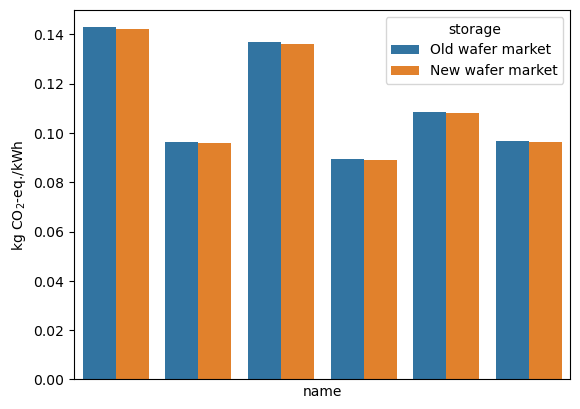

In [101]:
# plot with seaborn barplot
sns.barplot(data=df, x='name', y='GWP', hue='storage')
plt.xticks([])
plt.ylabel("kg CO$_2$-eq./kWh")

In [ ]:
bw2io.backup.restore_project_directory()

In [103]:
bw2data.projects.dir

'/Users/romain/Library/Application Support/Brightway3/winter-school.eb0559214e59a3f1e9ea4ce7cd020b22'

In [105]:
dbs_to_delete = [db for db in bw2data.databases if db.startswith("PV")]
dbs_to_delete

['PV 2035',
 'PV 2050',
 'PV 2050 - eff',
 'PV 2050 - eff - lifetime',
 'PV + storage']

In [106]:
for db in dbs_to_delete:
    del bw2data.databases[db]

Vacuuming database 
Vacuuming database 
Vacuuming database 
Vacuuming database 
Vacuuming database 


In [ ]:
db_1 = []
db_2 = []
db_3 = db_1 + db_2

In [104]:
bw2data.databases

Databases dictionary with 20 object(s):
	PV + storage
	PV 2035
	PV 2050
	PV 2050 - eff
	PV 2050 - eff - lifetime
	biosphere
	carbon fiber
	ecoinvent-3.10-cutoff
	ei_cutoff_3.10_remind_SSP2-Base_2020 2025-01-20
	ei_cutoff_3.10_remind_SSP2-Base_2020 2025-01-21
	ei_cutoff_3.10_remind_SSP2-Base_2035 2025-01-20
	ei_cutoff_3.10_remind_SSP2-Base_2035 2025-01-21
	ei_cutoff_3.10_remind_SSP2-Base_2050 2025-01-20
	ei_cutoff_3.10_remind_SSP2-Base_2050 2025-01-21
	ei_cutoff_3.10_remind_SSP2-PkBudg1150_2020 2025-01-20
	ei_cutoff_3.10_remind_SSP2-PkBudg1150_2035 2025-01-20
	ei_cutoff_3.10_remind_SSP2-PkBudg1150_2050 2025-01-20
	ei_cutoff_3.10_remind_SSP2-PkBudg1150_2050 2025-01-21
	ei_cutoff_3.10_remind_SSP2-PkBudg500_2050 2025-01-21
	wafer

In [102]:
bw2io.backup_project_directory("winter-school")

Signature: bw2io.backup_project_directory(project: str)
Docstring:
Backup project data directory to a ``.tar.gz`` (compressed tar archive) in the user's home directory.

Parameters
----------
project : str
    Name of the project to backup.

Returns
-------
project_name : str
    Name of the project that was backed up.

Raises
------
ValueError
   If the project does not exist.

See Also
--------
bw2io.backup.restore_project_directory: To restore a project directory from a backup.
File:      /opt/homebrew/Caskroom/miniforge/base/envs/wurst/lib/python3.11/site-packages/bw2io/backup.py
Type:      function

In [ ]:
bw2io.export.

In [ ]:
for ds in bw2data.Database("wafer"):
    if ds["name"] == "market for single-Si wafer, photovoltaic":
        for exc in ds.exchanges():
            print(exc)

In [ ]:
for ds in bw2data.Database("ecoinvent-3.10-cutoff"):
    if ds["name"] == "market for single-Si wafer, photovoltaic":
        for exc in ds.exchanges():
            print(exc)